In [134]:
import pandas as pd
import datetime

# pair_speed = pd.read_csv("pair_speed_v3.csv", header=None, names=["pair", "day", "hour", "cond", "speed", "count"], 
#                          parse_dates=[["day", "hour"]], index_col="day_hour")
pair_speed = pd.read_csv("speed_sample.csv", header=None, names=["pair", "day", "hour", "cond", "speed", "count"], 
                          parse_dates=[["day", "hour"]], index_col="day_hour")
pair_speed.head(10)

,pair,cond,speed,count
day_hour,,,,
2014-08-03 06:00:00,67421-64775,1,13.533016,24
2014-08-03 06:05:00,67421-64775,1,12.792718,12
2014-08-03 06:10:00,67421-64775,1,15.486202,18
2014-08-03 06:15:00,67421-64775,1,16.958159,15
2014-08-03 06:20:00,67421-64775,1,15.849926,19
2014-08-03 06:25:00,67421-64775,1,14.100779,17
2014-08-03 06:30:00,67421-64775,1,17.531659,22
2014-08-03 06:35:00,67421-64775,1,15.435477,13
2014-08-03 06:40:00,67421-64775,1,15.405453,20


In [135]:
pd.DataFrame(pair_speed.head(10).groupby('pair')['count'].sum()).sort('count', ascending=False)

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,count
pair,
67421-64775,190


In [136]:
all_mean = pair_speed.groupby(lambda x: (x.isoweekday(), x.hour, x.minute))['speed'].mean()

In [ ]:
pd.DataFrame(all_mean).to_json('mean_speed.csv')
from IPython.display import FileLink
FileLink('mean_speed.csv')

In [137]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
def mean_absolute_per_error(y_p, y_t):
    return np.mean(np.abs(y_p - y_t) / y_t)

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
# sample = pair_speed[pair_speed.pair=='36383-38764']
sample = pair_speed
# sample = pair_speed.head(100)
import datetime
# def merge_time(s):
#     time_s = str(s['day']) + str(s['hour']).rjust(4, '0')
#     return datetime.datetime.strptime(time_s, "%Y%m%d%H%M")
# sample['time'] = sample.apply(lambda s: merge_time(s), 1)
# sample.index = sample.time
plt.rc('figure', figsize=(20,10))
# mean = sample.groupby(lambda x: (x.isoweekday(), x.hour, x.minute))['speed'].mean()
# import seaborn as sns
# mean.plot()
# plt.show()
# pd.rolling_mean(mean, 2, min_periods=1).plot(label='rolling mean')
# mean.plot(label='mean')
# pd.ewma(mean, span=2).plot(style='k--', label='ewma')
# plt.legend(loc='best')
# plt.show()

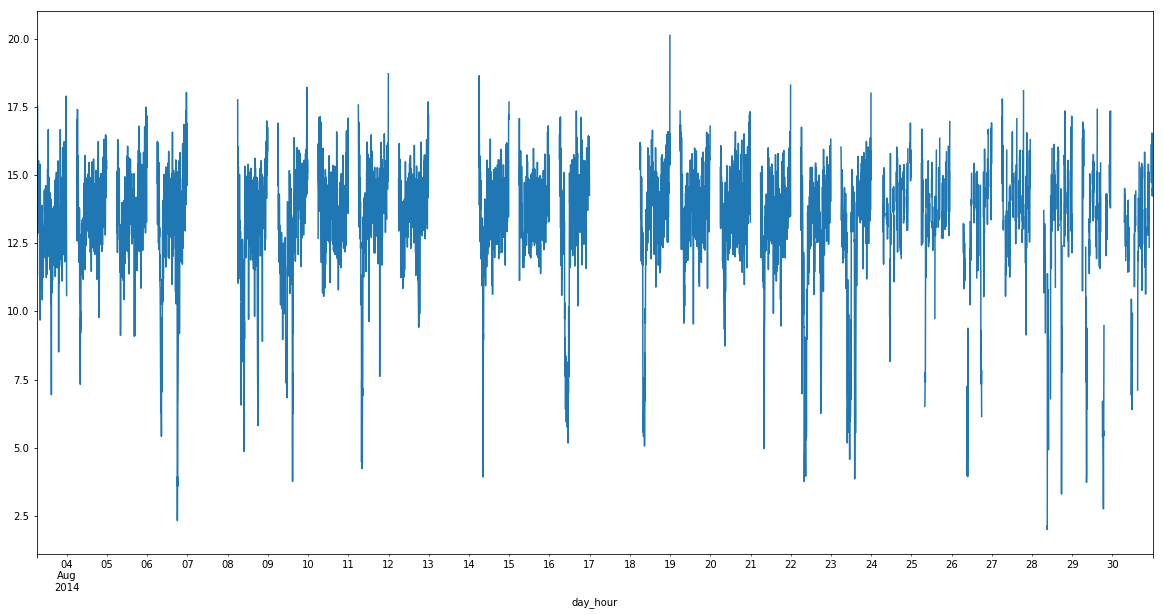

In [161]:
non_empty_sample = sample#[sample['cond']==1]
week_day_mean = non_empty_sample.groupby(lambda x: (x.isoweekday(), x.hour, x.minute))['speed'].mean()
hour_mean = non_empty_sample.groupby(lambda x: (x.hour, x.minute))['speed'].mean()
all_mean = non_empty_sample['speed'].mean()
sample_mean = non_empty_sample.resample('5min')['speed'].mean()
# plt.ylim([0, sample_mean.max()])
sample_mean.plot()

In [148]:
np.random.seed(7)

In [162]:
dataset = []
dataset_time_index = []
weather = {'2014-08-03': 0, '2014-08-04': 1, '2014-08-05': 1, '2014-08-06': 1, '2014-08-07': 1, '2014-08-08': 1, '2014-08-09': 1, '2014-08-10': 1, '2014-08-11': 0, '2014-08-12': 0, '2014-08-13': 0, '2014-08-14': 0, '2014-08-15': 1, '2014-08-16': 1, '2014-08-17': 0, '2014-08-18': 0, '2014-08-19': 0, '2014-08-20': 1, '2014-08-21': 1, '2014-08-22': 1, '2014-08-23': 0, '2014-08-24': 0, '2014-08-25': 1, '2014-08-26': 1, '2014-08-27': 0, '2014-08-28': 0, '2014-08-29': 0, '2014-08-30': 0}
for (t, s) in sample_mean.iteritems():
    speed = s
    if t.hour > 5:
        if math.isnan(s):
            try:
                speed = week_day_mean[(t.isoweekday(), t.hour, t.minute)]
            except:
                try:
                    speed = hour_mean[(t.hour, t.minute)]
                except:
                    speed = all_mean
#         day_feature = [1 if i == t.isoweekday() else 0 for i in range(1,8)] + [t.hour, t.minute]
#         day_feature = [t.isoweekday(), t.hour, t.minute, 1 if t.isoweekday() in [6,7] else 0]
#         day_feature = [t.isoweekday()]
        day_feature = []
#         feature = [speed, weather[t.strftime('%Y-%m-%d')]] + day_feature
        feature = [speed] + day_feature
        dataset.append(feature)
        dataset_time_index.append(t)
                   
dataset = np.array(dataset)

In [163]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset[:, 0] = scaler.fit_transform(dataset[:, 0])

/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [164]:
train_size = 36 * 21 * 6
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

(4536, 1512)


In [165]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [166]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

In [167]:
from keras.regularizers import l2, activity_l2
hidden_neurons = 500
loss_function = 'mse'
batch_size = 105
dropout = 0.056
inner_hidden_neurons = 458
dropout_inner = 0.12
out_neurons = 1
model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, trainX.shape[2]), activation='tanh', dropout_U=0.05, stateful=True, return_sequences=True))
# model.add(LSTM(8, batch_input_shape=(batch_size, look_back, trainX.shape[2]), activation='tanh', dropout_U=0.05, stateful=True))
# model.add(Dense(1))
# for i in range(100):
#     model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
#     model.reset_states()
in_neurons = trainX.shape[2]
gpu_cpu = 'cpu'
model.add(LSTM(output_dim=hidden_neurons, input_dim=in_neurons, return_sequences=True, init='uniform',
                   consume_less=gpu_cpu))
model.add(Dropout(dropout))

dense_input = inner_hidden_neurons
model.add(LSTM(output_dim=inner_hidden_neurons, input_dim=hidden_neurons, return_sequences=True, consume_less=gpu_cpu))
model.add(Dropout(dropout_inner))
model.add(LSTM(input_dim=inner_hidden_neurons, output_dim=dense_input, return_sequences=False))
model.add(Dropout(dropout_inner))
model.add(Activation('relu'))

model.add(Dense(output_dim=out_neurons, input_dim=dense_input))
model.add(Activation('relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=5, batch_size=batch_size, verbose=1, shuffle=False)


Epoch 1/5
4523/4523 [==============================] - 40s - loss: 0.0327     

In [ ]:
from keras.utils.visualize_util import plot
plot(model, to_file='lstm.png', show_shapes=True)
from IPython.display import Image
Image(filename='lstm.png')

In [168]:
trainPredict = model.predict(trainX, batch_size=batch_size)
# model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
trainScore = mean_absolute_per_error(trainPredict[:, 0], trainY)
print('Train Score: %.2f MAPE' % (trainScore))
days = 10 * 6
testScore = mean_absolute_per_error(testPredict[0:36*days, 0], testY[0:36*days])
print('Test Score %.2f MAPE' % (testScore))

Train Score: 0.14 MAPE
Test Score 0.16 MAPE


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(6048,)
(6048,)


/root/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


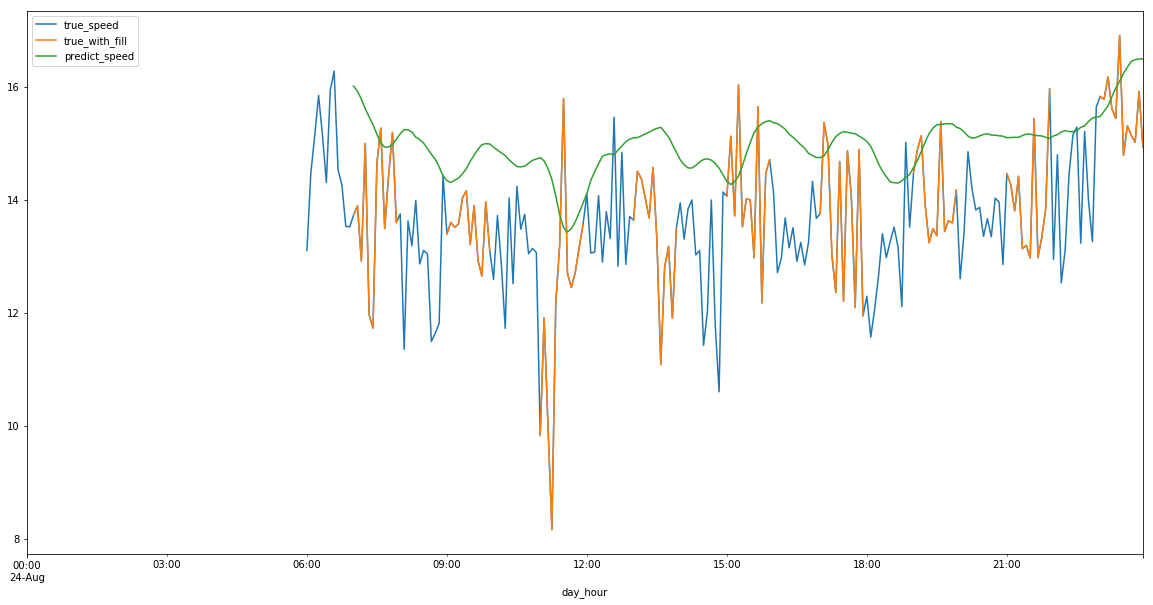

In [191]:
import numpy
trainPredictPlot = numpy.empty_like(dataset[:, 0])
trainPredictPlot[:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:, 0]

testPredictPlot = numpy.empty_like(dataset[:, 0])
testPredictPlot[:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict[:, 0]

print trainPredictPlot.shape
print testPredictPlot.shape
start = 21 * 36 * 6
end = 22 * 36 * 6
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# ax.set_ylim([0,10])
# ax.plot(scaler.inverse_transform(dataset[start:, 0]))
# ax.plot(trainPredictPlot[start:])
# ax.plot(testPredictPlot[start:])
# ax.set_xticks(dataset_time_index[start:])
pd.DataFrame(scaler.inverse_transform(dataset[start:end, 0]), index=dataset_time_index[start:end], columns=['true_speed']).plot(ax=ax, label="fill")
sample_mean['20140824':'20140824'].plot(ax=ax, label='true_with_fill')
pd.DataFrame(testPredictPlot[start:end], index=dataset_time_index[start:end], columns=['predict_speed']).plot(ax=ax, label="predict")
plt.legend(loc='best')

In [173]:
ori_dataset = scaler.inverse_transform(dataset)
ori_dataset.shape

(6048, 1)

/root/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1) (3, 0) (2, 1)


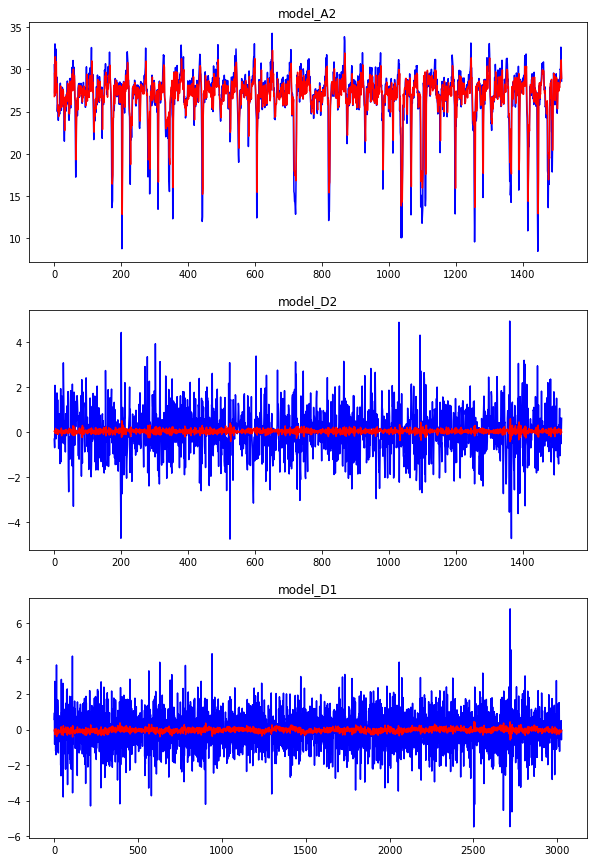

In [174]:
import pywt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA
A2,D2,D1 = pywt.wavedec(ori_dataset[:, 0],'db4',mode='sym',level=2) 
# 对每层小波系数求解模型系数
order_A2 = sm.tsa.arma_order_select_ic(A2,ic='aic')['aic_min_order']   # AIC准则求解模型阶数p,q
order_D2 = sm.tsa.arma_order_select_ic(D2,ic='aic')['aic_min_order']   # AIC准则求解模型阶数p,q
order_D1 = sm.tsa.arma_order_select_ic(D1,ic='aic')['aic_min_order']   # AIC准则求解模型阶数p,q

print order_A2,order_D2,order_D1   #各个模型阶次

# 对每层小波系数构建ARMA模型
model_A2 =  ARMA(A2,order=order_A2)   # 建立模型
model_D2 =  ARMA(D2,order=order_D2)
model_D1 =  ARMA(D1,order=order_D1)

results_A2 = model_A2.fit()
results_D2 = model_D2.fit()
results_D1 = model_D1.fit()

# 画出每层的拟合曲线
plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
plt.plot(A2, 'blue')
plt.plot(results_A2.fittedvalues,'red')
plt.title('model_A2')

plt.subplot(3, 1, 2)
plt.plot(D2, 'blue')
plt.plot(results_D2.fittedvalues,'red')
plt.title('model_D2')

plt.subplot(3, 1, 3)
plt.plot(D1, 'blue')
plt.plot(results_D1.fittedvalues,'red')
plt.title('model_D1')

[0, 0, 0]
0.0735894838446


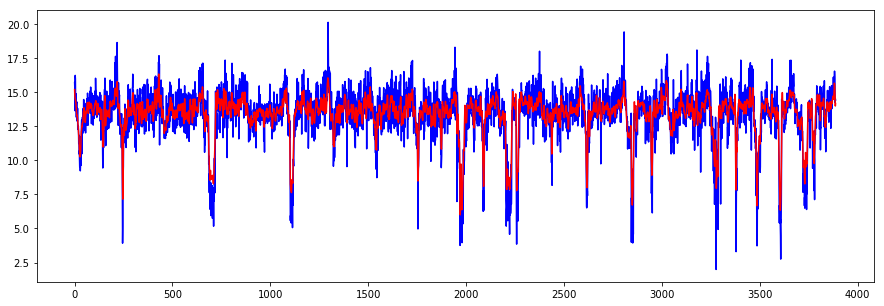

In [178]:
A2_all,D2_all,D1_all = pywt.wavedec(ori_dataset[:, 0],'db4',mode='sym',level=2) # 对所有序列分解
delta = [len(A2_all)-len(A2),len(D2_all)-len(D2),len(D1_all)-len(D1)] # 求出差值，则delta序列对应的为每层小波系数ARMA模型需要预测的步数

print delta
# 预测小波系数 包括in-sample的和 out-sample的需要预测的小波系数
pA2 = model_A2.predict(params=results_A2.params,start=1,end=len(A2)+delta[0])
pD2 = model_D2.predict(params=results_D2.params,start=1,end=len(D2)+delta[1])
pD1 = model_D1.predict(params=results_D1.params,start=1,end=len(D1)+delta[2])
start = 36*10*6
# 重构
coeff_new = [pA2,pD2,pD1]
denoised_index = pywt.waverec(coeff_new,'db4')

# 画出重构后的原序列预测图
plt.figure(figsize=(15,5))
plt.plot(ori_dataset[start:, 0], 'blue')
plt.plot(denoised_index[start:],'red')
print mean_absolute_per_error(denoised_index[start:], ori_dataset[start:, 0])

(3, 1)


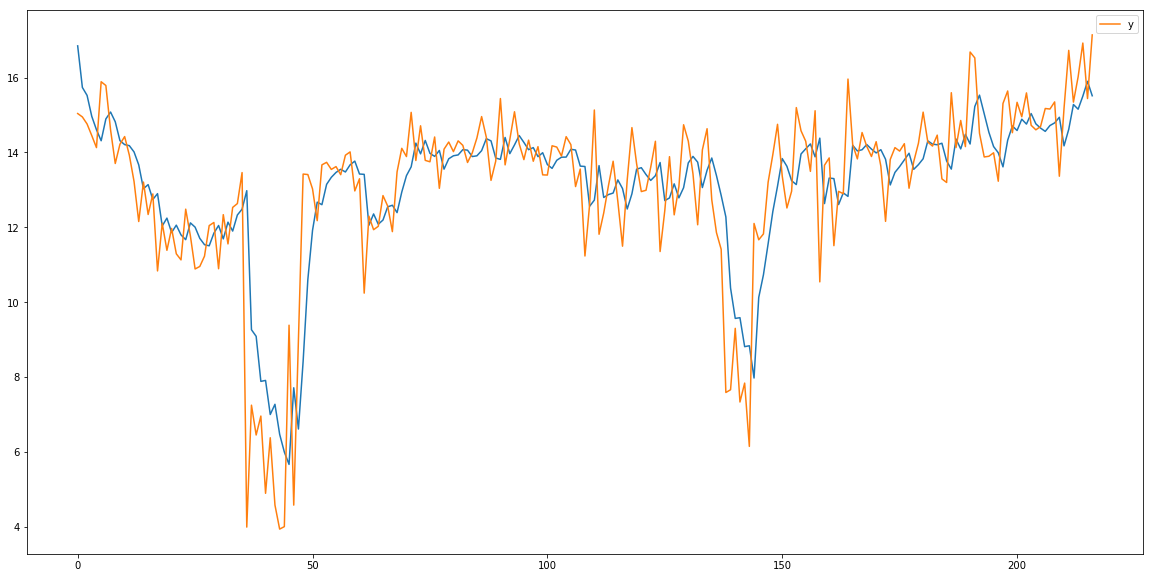

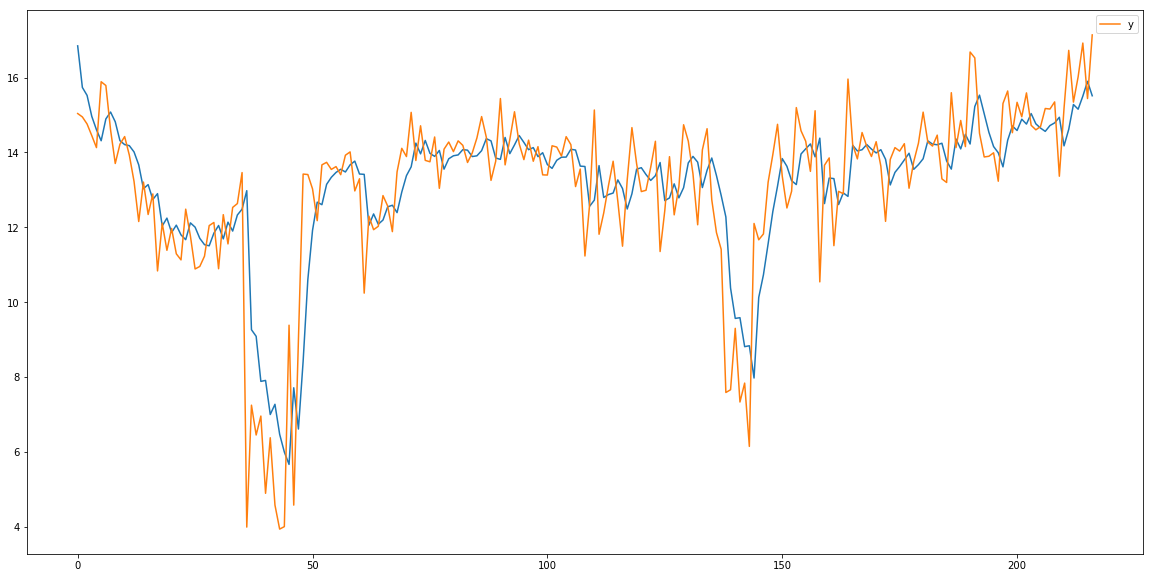

In [182]:
import statsmodels.api as sm
# sample_df = pd.DataFrame(dataset[:, 0], index=dataset_time_index, columns=["speed"])
# o = sm.tsa.arma_order_select_ic(sample_df['speed'],ic='aic')['aic_min_order']
o = sm.tsa.arma_order_select_ic(ori_dataset[:, 0], ic='aic')['aic_min_order']
print o
# arma_mod22 = sm.tsa.ARMA(sample_df['speed'], order=o).fit()
arma_mod22 = sm.tsa.ARMA(ori_dataset[:, 0], order=o).fit()
# st = datetime.datetime.strptime('201408241100', '%Y%m%d%H%M')
# y_predict = arma_mod22.predict(start=st.strftime('%Y%m%d%H%M'), end=(st+datetime.timedelta(minutes=30)).strftime('%Y%m%d%H%M'), dynamic=True)
# y_predict = arma_mod22.predict(start=36*21, end=36*24, dynamic=True)
arma_mod22.plot_predict(start=36*23*6, end=36*24*6, dynamic=False)
# sm.graphics.tsa.plot_pacf(ori_dataset, lags=50)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

n_iter = len(mean.values)
sz = (n_iter,) # size of array


z = mean.values

# Q = 1e-5 # process variance
Q = 1e-5
# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.0001 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 10.0
P[0] = 1.0

gap = 1
# arma_mod22 = sm.tsa.ARMA(stsa.dta['speed'], (8,1)).fit()

for k in range(gap,n_iter):
    # time update
    xhatminus[k] = xhat[k-gap]
    # arma_mod22.predict()
    Pminus[k] = P[k-gap]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure(figsize=(20,10))
plt.plot(z,'r-',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

In [ ]:
len(pair_speed)

In [ ]:
pair_groups = pair_speed.groupby('pair')

In [ ]:
sample['speed'].resample('30min').sort_index(ascending=True)[datetime.datetime(2014,8,3,11):datetime.datetime(2014,8,3,12)]

In [ ]:
import numpy as np
c = 0
result = []
current_a = []
for i, g in pair_groups:
    c += 1
    sample = pd.DataFrame(g)
    sample['time'] = sample.apply(lambda s: merge_time(s), 1)
    sample.index = sample["time"]
    start = datetime.datetime(2014,8,24,19)
    end = datetime.datetime(2014,8,24,21)
    date_range = pd.date_range(start, end, freq='30min')
    history_range = [(d.isoweekday() < 6, d.hour, d.minute) for d in date_range]

    history = sample.groupby(lambda x: (x.isoweekday() < 6, x.hour, x.minute))['speed'].mean()
    
    result.append(history[history_range].values.tolist())
    
    sample_mean = sample['speed'].resample('30min').sort_index(ascending=True)
    current = []
    
    for d in date_range:
        try:
            current.append(sample_mean[d])
        except:
            current.append(np.nan)
    current_a.append(current)
    
    if c > 10000:
        break

In [ ]:
a = np.matrix(result)
U, s, V = np.linalg.svd(a, full_matrices=False)
U.shape, V.shape, s.shape

In [ ]:
U.dot(np.diag(s)).dot(V)

In [ ]:
a = np.matrix(np.hstack((np.array(result), np.array(current_a))))

In [ ]:
u = np.ones((2002,5)) * 10
v = np.ones((5,5)) 

In [ ]:
for i in range(10):
    u = u + 2 * 0.001 * (a - u.dot(v)) * v

np.sqrt(np.mean((a - u.dot(v))**2))

In [ ]:
a.shape

In [ ]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MatrixFactorization
X_filled_knn = KNN(k=3).complete(a)

In [ ]:
X_filled_knn[0]

In [ ]:
X_filled_softimpute = SoftImpute().complete(a)

In [ ]:
X_filled_softimpute[1]

In [ ]:
a[1]

In [ ]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MatrixFactorization
??KNN